# Task
Modify the selected empty cell based on the requirements, remember to include the modified cell id(s) in your response.
Requirements:
Task 2: Predict Future Stock Prices (Short-Term)
Objective:
Use historical stock data to predict the next day's closing price.
Dataset:
Stock market data from Yahoo Finance (retrieved using the yfinance Python library)
Instructions:
● Select a stock (e.g., Apple, Tesla).
● Load historical data using the yfinance library.
● Use features like Open, High, Low, and Volume to predict the next Close price.
● Train a Linear Regression or Random Forest model.
● Plot actual vs predicted closing prices for comparison.

Skills:
● Time series data handling
● Regression modeling
● Data fetching using APIs (yfinance)
● Plotting predictions vs real data

## Install necessary libraries

### Subtask:
Install the required Python libraries: `yfinance`, `scikit-learn`, and `matplotlib`.


**Reasoning**:
Install the required libraries using pip in separate code cells.



In [ ]:
%pip install yfinance

**Reasoning**:
Install scikit-learn using pip.



In [ ]:
%pip install scikit-learn

**Reasoning**:
Install matplotlib using pip.



In [ ]:
%pip install matplotlib

## Load data

### Subtask:
Use `yfinance` to download historical stock data for a selected stock.


**Reasoning**:
Import the `yfinance` library and download historical stock data for a selected ticker using `yf.download()`.



In [ ]:
import yfinance as yf
import pandas as pd

# Choose a stock ticker symbol
ticker = 'AAPL'

# Define the start and end dates for historical data
start_date = '2020-01-01'
end_date = '2023-01-01'

# Download historical data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the downloaded data
display(stock_data.head())

/tmp/ipython-input-12-3772001934.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620857,72.681304,71.373233,71.627107,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307495,73.609729,71.849518,71.849518,132079200


## Prepare data

### Subtask:
Create features and the target variable for the model. The target variable will be the next day's closing price.


**Reasoning**:
Create the 'Next_Close' column, drop the last row, and define the features (X) and target variable (y).



In [ ]:
stock_data['Next_Close'] = stock_data['Close'].shift(-1)
stock_data.dropna(inplace=True)

X = stock_data[['Open', 'High', 'Low', 'Volume']]
y = stock_data['Next_Close']

display(stock_data.head())
display(X.head())
display(y.head())

Price,Close,High,Low,Open,Volume,Next_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-01-02,72.620857,72.681304,71.373233,71.627107,135480400,71.914810
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800,72.487846
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200,72.146942
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000,73.307495
2020-01-08,73.307495,73.609729,71.849518,71.849518,132079200,74.864624


Price,Open,High,Low,Volume
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2020-01-02,71.627107,72.681304,71.373233,135480400
2020-01-03,71.847110,72.676439,71.689950,146322800
2020-01-06,71.034709,72.526533,70.783248,118387200
2020-01-07,72.497529,72.753823,71.926915,108872000
2020-01-08,71.849518,73.609729,71.849518,132079200


,Next_Close
Date,
2020-01-02,71.914810
2020-01-03,72.487846
2020-01-06,72.146942
2020-01-07,73.307495
2020-01-08,74.864624


## Train model

### Subtask:
Train a regression model (e.g., Linear Regression or Random Forest) on the historical data.


**Reasoning**:
Import the Linear Regression model from sklearn and train it on the prepared data.



In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X, y)

LinearRegression()

## Predict

### Subtask:
Make predictions for the next day's closing price using the trained model.


**Reasoning**:
I will now use the trained linear regression model to predict the next day's closing price. The predictions will be stored in a new column called 'Predicted_Close' in the `stock_data` dataframe. Finally, I will display the head of the updated `stock_data` dataframe to verify the new column and its values.



In [ ]:
stock_data['Predicted_Close'] = model.predict(X)
display(stock_data.head())

Price,Close,High,Low,Open,Volume,Next_Close,Predicted_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2020-01-02,72.620857,72.681304,71.373233,71.627107,135480400,71.914810,72.831161
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800,72.487846,72.981736
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200,72.146942,72.574921
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000,73.307495,72.674898
2020-01-08,73.307495,73.609729,71.849518,71.849518,132079200,74.864624,73.887798


## Visualize results

### Subtask:
Plot the actual and predicted closing prices to compare the model's performance.


**Reasoning**:
Plot the actual and predicted closing prices from the `stock_data` DataFrame.



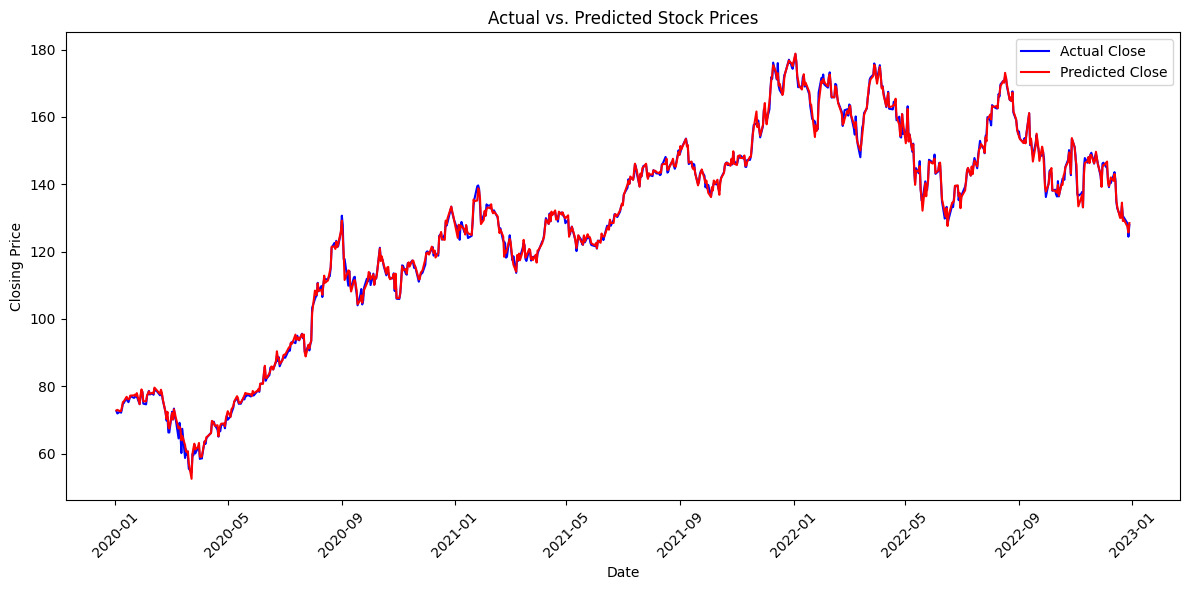

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual and predicted closing prices
ax.plot(stock_data.index, stock_data['Close'], label='Actual Close', color='blue')
ax.plot(stock_data.index, stock_data['Predicted_Close'], label='Predicted Close', color='red')

# Add title and labels
ax.set_title('Actual vs. Predicted Stock Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# Add legend
ax.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The necessary libraries (`yfinance`, `scikit-learn`, `matplotlib`) were successfully installed.
*   Historical stock data for the 'AAPL' ticker from '2020-01-01' to '2023-01-01' was successfully downloaded using `yfinance`.
*   A 'Next\_Close' column was created by shifting the 'Close' prices, and the resulting row with a NaN value was dropped.
*   Features (`X`: 'Open', 'High', 'Low', 'Volume') and the target variable (`y`: 'Next\_Close') were successfully defined.
*   A `LinearRegression` model was successfully imported from `sklearn.linear_model` and trained on the prepared data.
*   Predictions for the next day's closing price were generated using the trained model and stored in a new column 'Predicted\_Close' in the `stock_data` DataFrame.
*   A plot comparing the 'Actual Close' and 'Predicted Close' prices over time was successfully generated and displayed, providing a visual comparison of the model's performance.

### Insights or Next Steps

*   Consider evaluating the model's performance using quantitative metrics like Mean Squared Error (MSE) or R-squared to get a more objective assessment of accuracy.
*   Explore using more advanced models like Random Forest or time series specific models (e.g., ARIMA, LSTM) to potentially improve prediction accuracy.


## Evaluate model performance

### Subtask:
Calculate and display evaluation metrics (MSE, R-squared) for the trained model.

**Reasoning**:
Import the necessary metrics from `sklearn.metrics` and calculate the Mean Squared Error (MSE) and R-squared score using the actual and predicted closing prices. Finally, print the calculated metrics to evaluate the model's performance.

In [1]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(stock_data['Next_Close'], stock_data['Predicted_Close'])

# Calculate R-squared score
r2 = r2_score(stock_data['Next_Close'], stock_data['Predicted_Close'])

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

NameError: name 'stock_data' is not defined

In [2]:
import yfinance as yf
import pandas as pd

# Choose a stock ticker symbol
ticker = 'AAPL'

# Define the start and end dates for historical data
start_date = '2020-01-01'
end_date = '2023-01-01'

# Download historical data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the downloaded data
display(stock_data.head())

/tmp/ipython-input-3772001934.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400
2020-01-03,71.833305,72.594071,71.608700,71.765682,146322800
2020-01-06,72.405685,72.444328,70.703020,70.954195,118387200
2020-01-07,72.065147,72.671341,71.845369,72.415337,108872000
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200


In [3]:
stock_data['Next_Close'] = stock_data['Close'].shift(-1)
stock_data.dropna(inplace=True)

X = stock_data[['Open', 'High', 'Low', 'Volume']]
y = stock_data['Next_Close']

display(stock_data.head())
display(X.head())
display(y.head())

Price,Close,High,Low,Open,Volume,Next_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,71.833305
2020-01-03,71.833305,72.594071,71.608700,71.765682,146322800,72.405685
2020-01-06,72.405685,72.444328,70.703020,70.954195,118387200,72.065147
2020-01-07,72.065147,72.671341,71.845369,72.415337,108872000,73.224411
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,74.779747


Price,Open,High,Low,Volume
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2020-01-02,71.545890,72.598892,71.292304,135480400
2020-01-03,71.765682,72.594071,71.608700,146322800
2020-01-06,70.954195,72.444328,70.703020,118387200
2020-01-07,72.415337,72.671341,71.845369,108872000
2020-01-08,71.768086,73.526303,71.768086,132079200


,Next_Close
Date,
2020-01-02,71.833305
2020-01-03,72.405685
2020-01-06,72.065147
2020-01-07,73.224411
2020-01-08,74.779747


In [4]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X, y)

LinearRegression()

In [5]:
stock_data['Predicted_Close'] = model.predict(X)
display(stock_data.head())

Price,Close,High,Low,Open,Volume,Next_Close,Predicted_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,71.833305,72.748580
2020-01-03,71.833305,72.594071,71.608700,71.765682,146322800,72.405685,72.899023
2020-01-06,72.405685,72.444328,70.703020,70.954195,118387200,72.065147,72.492662
2020-01-07,72.065147,72.671341,71.845369,72.415337,108872000,73.224411,72.592504
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,74.779747,73.804057


In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(stock_data['Next_Close'], stock_data['Predicted_Close'])

# Calculate R-squared score
r2 = r2_score(stock_data['Next_Close'], stock_data['Predicted_Close'])

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 7.476172457159601
R-squared (R2) Score: 0.991868101433056


In [7]:
%pip install yfinance

In [8]:
%pip install scikit-learn

In [9]:
%pip install matplotlib

In [10]:
import yfinance as yf
import pandas as pd

# Choose a stock ticker symbol
ticker = 'AAPL'

# Define the start and end dates for historical data
start_date = '2020-01-01'
end_date = '2023-01-01'

# Download historical data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the downloaded data
display(stock_data.head())

/tmp/ipython-input-3772001934.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400
2020-01-03,71.833305,72.594071,71.608700,71.765682,146322800
2020-01-06,72.405685,72.444328,70.703020,70.954195,118387200
2020-01-07,72.065147,72.671341,71.845369,72.415337,108872000
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200


In [11]:
stock_data['Next_Close'] = stock_data['Close'].shift(-1)
stock_data.dropna(inplace=True)

X = stock_data[['Open', 'High', 'Low', 'Volume']]
y = stock_data['Next_Close']

display(stock_data.head())
display(X.head())
display(y.head())

Price,Close,High,Low,Open,Volume,Next_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,71.833305
2020-01-03,71.833305,72.594071,71.608700,71.765682,146322800,72.405685
2020-01-06,72.405685,72.444328,70.703020,70.954195,118387200,72.065147
2020-01-07,72.065147,72.671341,71.845369,72.415337,108872000,73.224411
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,74.779747


Price,Open,High,Low,Volume
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2020-01-02,71.545890,72.598892,71.292304,135480400
2020-01-03,71.765682,72.594071,71.608700,146322800
2020-01-06,70.954195,72.444328,70.703020,118387200
2020-01-07,72.415337,72.671341,71.845369,108872000
2020-01-08,71.768086,73.526303,71.768086,132079200


,Next_Close
Date,
2020-01-02,71.833305
2020-01-03,72.405685
2020-01-06,72.065147
2020-01-07,73.224411
2020-01-08,74.779747


In [12]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X, y)

LinearRegression()

In [13]:
stock_data['Predicted_Close'] = model.predict(X)
display(stock_data.head())

Price,Close,High,Low,Open,Volume,Next_Close,Predicted_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,71.833305,72.748580
2020-01-03,71.833305,72.594071,71.608700,71.765682,146322800,72.405685,72.899023
2020-01-06,72.405685,72.444328,70.703020,70.954195,118387200,72.065147,72.492662
2020-01-07,72.065147,72.671341,71.845369,72.415337,108872000,73.224411,72.592504
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,74.779747,73.804057


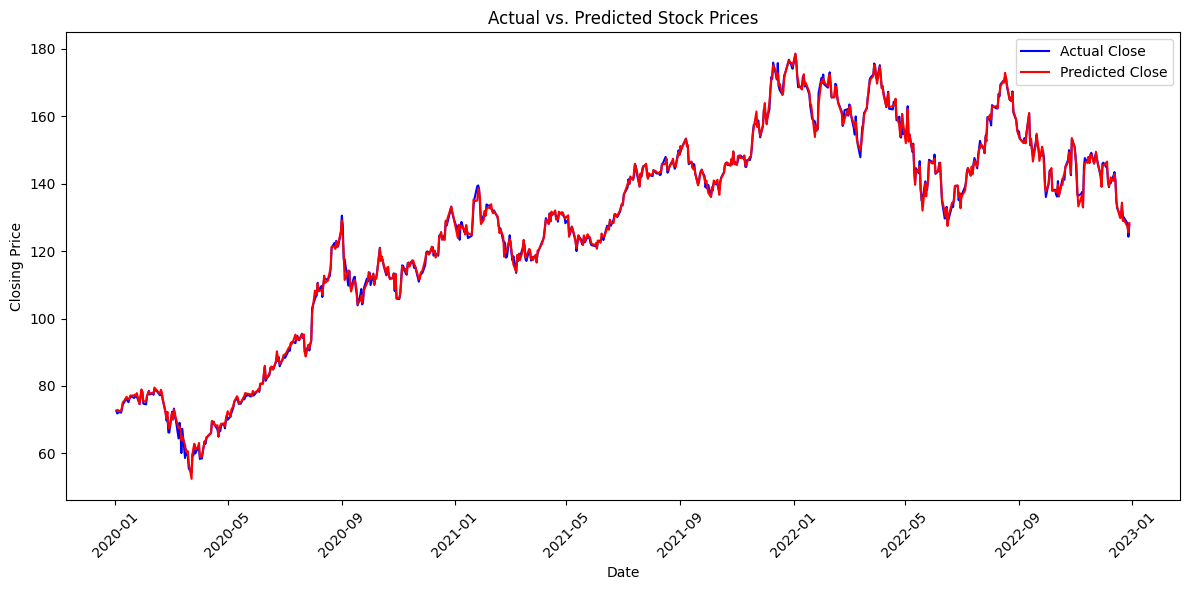

In [14]:
import matplotlib.pyplot as plt

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual and predicted closing prices
ax.plot(stock_data.index, stock_data['Close'], label='Actual Close', color='blue')
ax.plot(stock_data.index, stock_data['Predicted_Close'], label='Predicted Close', color='red')

# Add title and labels
ax.set_title('Actual vs. Predicted Stock Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# Add legend
ax.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(stock_data['Next_Close'], stock_data['Predicted_Close'])

# Calculate R-squared score
r2 = r2_score(stock_data['Next_Close'], stock_data['Predicted_Close'])

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 7.476172457159601
R-squared (R2) Score: 0.991868101433056
